In [18]:
import pandas as pd
import statsmodels.formula.api as smf


In [19]:

diab = pd.read_csv("F:\LAB Practice-DA\diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#Without min-centering, the intercept would represent the predicted log-odds 
#when a data point has a Glucose value of 0 in a dataset where the minimum Glucose value is 44
diab = diab.loc[:, ["Glucose", "Outcome"]]
diab = diab.loc[diab["Glucose"] != 0, :]
diab.describe()

,Glucose,Outcome
count,763.000000,763.000000
mean,121.686763,0.348624
std,30.535641,0.476847
min,44.000000,0.000000
25%,99.000000,0.000000
50%,117.000000,0.000000
75%,141.000000,1.000000
max,199.000000,1.000000


In [25]:

m1 = smf.logit(
  formula='Outcome ~ Glucose',
  data=diab) \
.fit()

m1.summary()

Optimization terminated successfully.
         Current function value: 0.515439
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  763
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.2028
Time:                        21:54:11   Log-Likelihood:                -393.28
converged:                       True   LL-Null:                       -493.35
Covariance Type:            nonrobust   LLR p-value:                 1.949e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7151      0.438    -13.045      0.000      -6.574      -4.856
Glucose        0.0406      0.003     12.014      0.000       0.034       0.047
==============================================================================
"""

In [22]:
newpred = pd.DataFrame({"Glucose": [10]})
m1.predict(newpred)

0    0.004924
dtype: float64

Text(0, 0.5, 'Pr(Diabetic)')

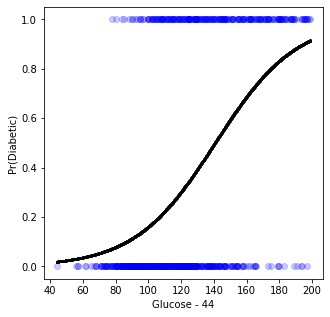

In [23]:
#In the plot above, we can clearly see the probability of diabetes increasing with higher glucose concentrations.
import numpy as np
import matplotlib.pyplot as plt

glucoseNew = pd.DataFrame({'Glucose': np.linspace(diab["Glucose"].min(), diab["Glucose"].max(), 1000)})
predProbs = m1.predict(glucoseNew)

plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(diab["Glucose"], diab["Outcome"], color='b', alpha=0.20)
ax.scatter(glucoseNew, predProbs , color="black", s=4)
ax.set_xlabel('Glucose - 44')
ax.set_ylabel('Pr(Diabetic)')